# Tarea 3. Optimización
Guillermo Segura Gómez

## Ejercicio 1

**Programe el Algoritmo 3 de la Clase 6 de descenso máximo con backtracking para calcular el tamaño de paso $\alpha_k$ de manera inexacta:**

1. **Programar la función que implementa el algoritmo de backtracking (Algoritmo 2 de la Clase 6) que usa la condición de descenso suficiente (condición de Armijo) para seleccionar el tamaño de paso.** La función recibe como entrada:
   - El valor inicial $\alpha_{\text{ini}}$,
   - El valor $\rho \in (0, 1)$,
   - La constante $c_1 \in (0, 1)$ para la condición de Armijo,
   - El punto $x_k$,
   - La función $f$,
   - El valor $f_k = f(x_k)$,
   - El valor del gradiente en el punto $x_k$, $\nabla f_k$,
   - La dirección de descenso $p_k$, y
   - El número máximo de iteraciones $Nb$.

   La función devuelve:
   - El tamaño de paso $\alpha_k$,
   - El número $i_k$ de iteraciones realizadas por el algoritmo de backtracking.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def Backtracking_DescSuf(alpha_0, rho, c1, xk, fk, gk, pk, nMax):

    for i in range(nMax):

        comp1 = fk(xk + alpha_0*pk)
        comp2 = fk(xk) + c1*alpha_0* np.dot(gk, pk)

        if (comp1 <= comp2):
            return alpha_0, i

        alpha_0 = alpha_0*rho

    return alpha_0, i
    

2. **Programar la función que implementa el algoritmo de descenso máximo con backtracking.** Ésta recibe como entrada:
   - La función $f(x)$,
   - El gradiente $\nabla f(x)$ de la función $f$,
   - Un punto inicial $x_0$,
   - Las tolerancia $\tau > 0$,
   - El número máximo de iteraciones $N$ para el algoritmo de descenso máximo,
   - El valor inicial $\alpha_{\text{ini}}$,
   - El valor $\rho \in (0, 1)$,
   - La constante $c_1 \in (0, 1)$ para la condición de Armijo, y
   - El número máximo de iteraciones $N_{\text{gs}}$ para el método de la sección dorada.

   La función devuelve:
   - El último punto $x_k$ generado por el algoritmo,
   - El número $k$ de iteraciones realizadas, y
   - Una variable indicadora que es `True` si el algoritmo termina por cumplirse la condición de paro ($\| \alpha_k p_k \| < \tau$) o `False` si termina porque se alcanzó el número máximo de iteraciones.
   - Si $n \neq 2$, devuelve un arreglo vacío. En caso contrario, devuelve un arreglo que contiene las componentes de los puntos de la secuencia, el tamaño de paso y la cantidad de iteraciones que hizo el algoritmo de backtracking en cada iteración:

   $$
   x_1^{(0)} \quad x_2^{(0)} \quad \alpha_0 \quad i_0 \\
   x_1^{(1)} \quad x_2^{(1)} \quad \alpha_0 \quad i_1 \\
   ... \\
   x_1^{(k)} \quad x_2^{(k)} \quad \alpha_k \quad i_k \\
   $$

In [41]:
def DescensoMax_Backtracking(f, gradf, x0, tau, nMax, alpha_0, rho, c1, nBack):

    xk = np.array(x0)
    sequence = []
    alpha_sequence = []
    iteraBack_sequence = []

    for k in range(nMax):

        # Calcular el gradiente
        gk = gradf(xk)
        pk = -gk # Dirección del descenso

        # Calcular el tamaño de paso utilizando backtracking
        alpha_k, iteraBack = Backtracking_DescSuf(alpha_0, rho, c1, xk, f, gk, pk, nBack)

        # Verificar la condición de parada
        if np.linalg.norm(alpha_k * pk) < tau:
            return xk, k, True, sequence, alpha_sequence, iteraBack_sequence
        
        # Actualizar xk para la siguiente iteración
        xk = xk + alpha_k * pk

        # Guardar la secuencia de puntos si la dimensión de x es 2
        if len(x0) == 2:
            sequence.append(xk.tolist())
            alpha_sequence.append(alpha_k)
            iteraBack_sequence.append(iteraBack)

    return xk, nMax, False, sequence, alpha_sequence, iteraBack_sequence

**3. Para probar el algoritmo, programe las siguientes funciones, calcule su gradiente de manera analítica y programe la función correspondiente. Use cada punto x0 como punto inicial del algoritmo.**

Función de Himmelblau: Para $x=\left(x_1, x_2\right)$
$$
\begin{gathered}
f(x)=\left(x_1^2+x_2-11\right)^2+\left(x_1+x_2^2-7\right)^2 . \\
x_0=(2 ., 4 .) \\
x_0=(0 ., 0 .)
\end{gathered}
$$

Función de Beale : Para $x=\left(x_1, x_2\right)$
$$
\begin{gathered}
f(x)=\left(1.5-x_1+x_1 x_2\right)^2+\left(2.25-x_1+x_1 x_2^2\right)^2+\left(2.625-x_1+x_1 x_2^3\right)^2 . \\
x_0=(2 ., 3 .) \\
x_0=(2 ., 4 .)
\end{gathered}
$$

Función de Rosenbrock: Para $x=\left(x_1, x_2, \ldots, x_n\right)$
$$
\begin{gathered}
f(x)=\sum_{i=1}^{n-1}\left[100\left(x_{i+1}-x_i^2\right)^2+\left(1-x_i\right)^2\right] \quad n \geq 2 \\
x_0=(-2.1,4.5) \\
x_0=(-1.2,1.0) \\
x_0=(-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5) \\
x_0=(-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0)
\end{gathered}
$$

Use las tolerancias $\tau_=\sqrt{n} \epsilon_m^{1 / 2}$, donde $\epsilon_m$ es el épsilon de la máquina, use el número de iteraciones máximas $N=30000$ para el descenso máximo.

In [42]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    df_dx1 = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dx2 = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx1, df_dx2])

In [43]:
def beale(x):
    return ((1.5 - x[0] + x[0]*x[1])**2 + 
            (2.25 - x[0] + x[0]*x[1]**2)**2 + 
            (2.625 - x[0] + x[0]*x[1]**3)**2)

def grad_beale(x):
    x1, x2 = x
    df_dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*x2**2)*(-1 + x2**2) + 2*(2.625 - x1 + x1*x2**3)*(-1 + x2**3)
    df_dx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*2*x1*x2 + 2*(2.625 - x1 + x1*x2**3)*3*x1*x2**2
    return np.array([df_dx1, df_dx2])



In [44]:
def rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def grad_rosenbrock(x):
    df_dx = np.zeros_like(x)
    n = len(x)
    df_dx[:-1] += -400 * x[:-1] * (x[1:] - x[:-1]**2) + 2 * (x[:-1] - 1)  # Derivadas parciales para x_i donde i < n
    df_dx[1:] += 200 * (x[1:] - x[:-1]**2)  # Derivadas parciales para x_{i+1} donde i < n
    return df_dx


In [45]:
# Función para visualizar los contornos de nivel de función en 2D
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

Función de Himmelblau:
Resultado para x0 = [2. 4.]:
xk = [3.00000001 2.        ], k = 58, f(xk) = 6.0859812873443046e-15, convergió: True
El valor promedio de los tamaños de paso:  0.021044739531034497
El valor promedio de las iteraciones del backtracking:  7.0
Secuencia de puntos: [[2.04194304, 0.43484159999999816], [4.066217822352746, 1.1257955049873196], [2.6570651553959292, 1.0477359052512343], [3.437838112582265, 1.454267189363323], [2.843038409191957, 1.535487078981859], [3.2480145502167748, 1.8251905169695504], [2.8910790887956277, 1.8319348990461295], [3.1190354802210143, 1.9816037807146032], [2.931351585747965, 1.944213342563611], [3.0573026156710843, 2.010713478930511]]


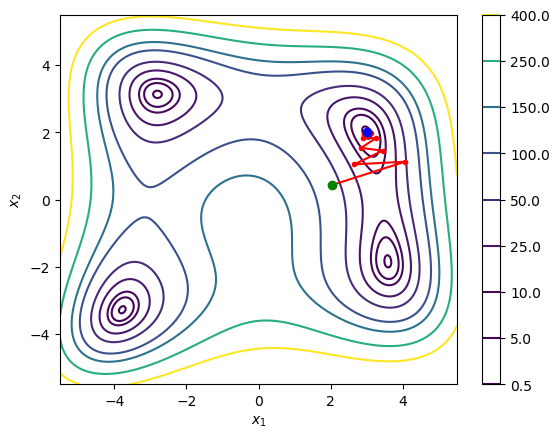


Resultado para x0 = [0. 0.]:
xk = [3.00000001 2.        ], k = 56, f(xk) = 3.722829880122556e-15, convergió: True
El valor promedio de los tamaños de paso:  0.0226835062857143
El valor promedio de las iteraciones del backtracking:  6.839285714285714
Secuencia de puntos: [[1.4000000000000001, 2.2], [3.031191040000001, 3.0342732800000003], [2.5006696682263403, 1.6497556789974832], [3.4059190639847268, 2.1196345099013767], [2.7540766188119954, 1.9005225603178233], [3.130567939587887, 2.0651139278648047], [2.935458579368898, 1.9812916762600135], [3.040228429204029, 2.021250318504773], [2.967567294120179, 1.9888574624352973], [3.0217460816920645, 2.0102688996954465]]


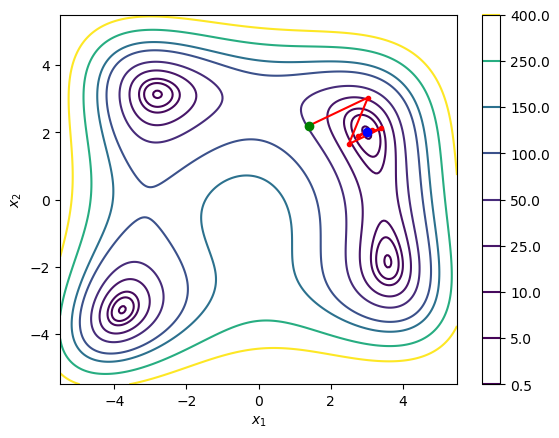


Función de Beale:
Resultado para x0 = [2. 3.]:
xk = [2.9999994  0.49999984], k = 1030, f(xk) = 6.127853334285063e-14, convergió: True
El valor promedio de los tamaños de paso:  0.04254149737457318
El valor promedio de las iteraciones del backtracking:  3.892233009708738
Secuencia de puntos: [[0.1379118662234604, -0.7539862059761937], [1.4620318120621314, -0.8117927925545356], [1.2820735203883535, 0.13550531774678432], [1.8129960515545867, -0.052832160093545244], [1.9774579576863032, 0.10986383601420732], [2.1195609564457603, 0.1777043963960555], [2.2207268697600404, 0.23016242987370336], [2.3015001143581175, 0.26277074892863034], [2.3642184201124596, 0.2925156401302378], [2.4182870124771725, 0.31095101623941646]]


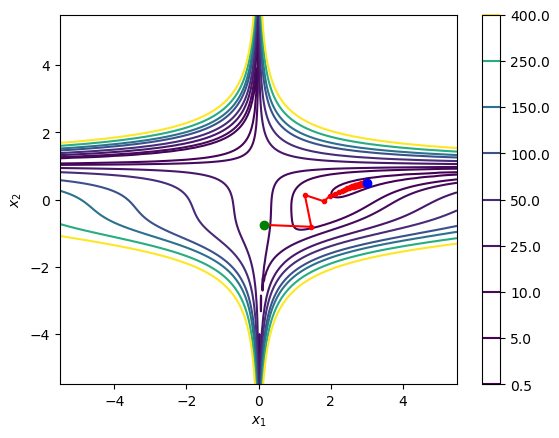


Resultado para x0 = [2. 4.]:
xk = [2.9999994  0.49999984], k = 1030, f(xk) = 6.065410817864437e-14, convergió: True
El valor promedio de los tamaños de paso:  0.04250922984709216
El valor promedio de las iteraciones del backtracking:  3.9
Secuencia de puntos: [[-0.6645498776831023, 0.01414255851089008], [1.0010590865354823, 0.31180241186039653], [1.6765986522736953, -0.11527013833232685], [1.9011089674957435, 0.04215774224897989], [2.0547472716624657, 0.15143359379251214], [2.17584639602814, 0.20504630960575135], [2.263836394265178, 0.24976120994205855], [2.3360032757034004, 0.27719777979396587], [2.3923272721699105, 0.3045519256201611], [2.44234380779658, 0.3197332880968752]]


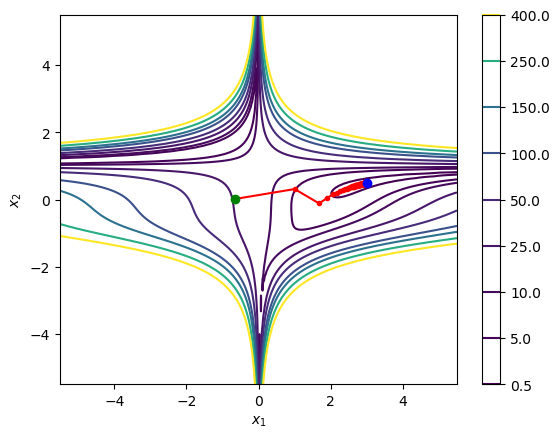


Función de Rosenbrock:
Resultado para x0 = [-2.1  4.5]:
xk = [0.99999421 0.99998838], k = 15741, f(xk) = 3.371906846082389e-11, convergió: True
El valor promedio de los tamaños de paso:  0.001922760938524302
El valor promedio de las iteraciones del backtracking:  18.084429197636744
Secuencia de puntos: [[-2.1327732233911156, 4.491499740330835], [-2.1119638073569265, 4.495823303499425], [-2.1231599078626613, 4.492476828722621], [-2.1140615480583147, 4.493924816377171], [-2.120971428849568, 4.491594934170967], [-2.115249374415058, 4.4922489694452885], [-2.1194868071784017, 4.490551840327443], [-2.1158709393424773, 4.490709802114528], [-2.1184436092578767, 4.489406431783516], [-2.116139825812734, 4.489255022685849]]


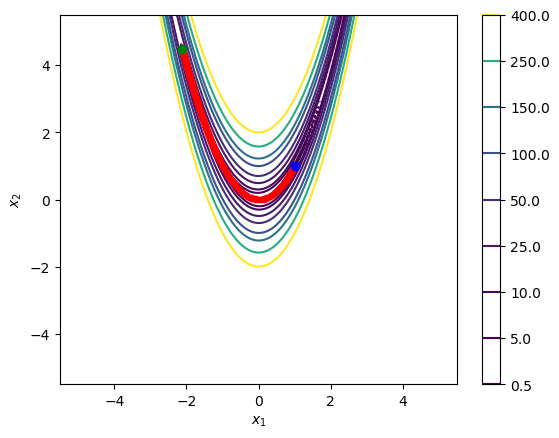


Resultado para x0 = [-1.2  1. ]:
xk = [0.9999943  0.99998859], k = 12935, f(xk) = 3.252745478475916e-11, convergió: True
El valor promedio de los tamaños de paso:  0.002162674081585395
El valor promedio de las iteraciones del backtracking:  17.27962891379977
Secuencia de puntos: [[-0.8892876545084544, 1.1268213655067534], [-1.0977821833300363, 1.0057686308423663], [-0.9655769201128948, 1.0632294002258669], [-1.0495651397096668, 1.0160710874660117], [-0.991917722472492, 1.0407193660568135], [-1.025352291623594, 1.0202483087497534], [-1.001132750884393, 1.0292119890188784], [-1.0133609696826023, 1.0195039561181471], [-1.0007061227825058, 1.022168825642147], [-1.0084647132329059, 1.01469065918104]]


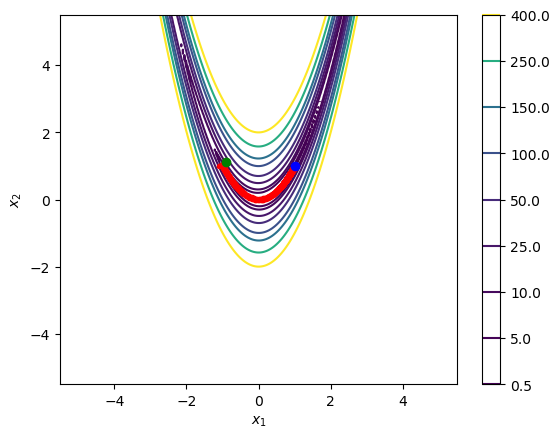


Resultado para x0 = [-2.1  4.5 -2.1  4.5 -2.1  4.5 -2.1  4.5 -2.1  4.5]:
xk = [0.99999997 0.99999994 0.99999988 0.99999977 0.99999952 0.99999905
 0.99999808 0.99999616 0.9999923  0.99998457], k = 19269, f(xk) = 7.909205941152011e-11, convergió: True

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [0.99999997 0.99999994 0.99999988 0.99999976 0.99999951 0.99999903
 0.99999805 0.99999609 0.99999216 0.99998428], k = 19116, f(xk) = 8.209613977294568e-11, convergió: True



In [46]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0]), np.array([0.0, 0.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0]), np.array([2.0, 4.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-2.1, 4.5]),
    np.array([-1.2, 1.0]),
    np.array([-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5]),
    np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0])
]
# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

n = 2  # Dimensión del problema

# Configuración de tolerancia
tau = np.sqrt(n) * epsilon_m**(1/2)

# Parámetros iniciales
alpha_0 = 0.1
rho = 0.8
c1 = 0.1

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 30000
NBack = 600

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, convergio, secuencia, a_seq, iBack_seq = DescensoMax_Backtracking(func, grad_func, x0, tau, NMax, alpha_0, rho, c1, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"El valor promedio de los tamaños de paso: ", np.mean(a_seq))
            print(f"El valor promedio de las iteraciones del backtracking: ", np.mean(iBack_seq))
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_descenso_maximo(himmelblau, grad_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_descenso_maximo(beale, grad_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_descenso_maximo(rosenbrock, grad_rosenbrock, puntos_iniciales_rosenbrock)


**3. Nocedal sugiere que la constante c1 sea del orden de 0.0001. Use c1 = 0.0001 y repita la prueba con la función de Beale y explique en qué casos conviene usar un valor grande o pequeño de c1.**

Función de Beale:
Resultado para x0 = [2. 3.]:
xk = [2.99999985 0.49999997], k = 1152, f(xk) = 6.235366115845221e-15, convergió: True
El valor promedio de los tamaños de paso:  0.04212183132458871
El valor promedio de las iteraciones del backtracking:  3.9375
Secuencia de puntos: [[-0.9095127090258428, -2.8656034468378015], [3.7502818937231908, 1.2562556952358417], [3.6212895894559267, -0.982643986514101], [3.0891027924617296, 1.223595651394934], [2.9453485435643234, -1.0842360277306735], [2.423995064849312, 0.89303715215], [2.4923886157348947, -0.535762412825056], [1.9281000356665785, 0.6807024220451481], [2.162080851490279, -0.3935946649981539], [1.8820869240240732, 0.33808096955095823]]


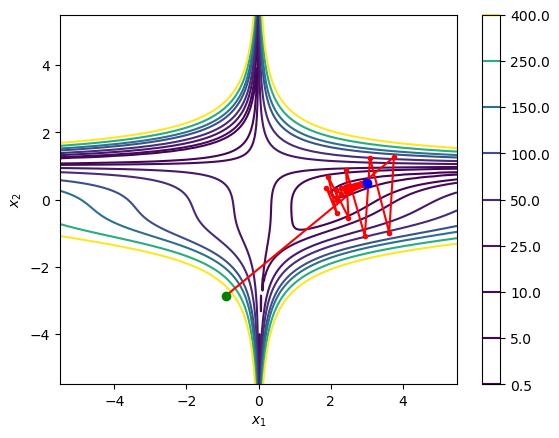


Resultado para x0 = [2. 4.]:
xk = [-33.80528321   1.02857446], k = 30000, f(xk) = 0.4966497175269631, convergió: False
El valor promedio de los tamaños de paso:  5.9925151547020985e-05
El valor promedio de las iteraciones del backtracking:  33.44676666666667
Secuencia de puntos: [[-2.163359183879847, -2.227902252326733], [0.0809058723385192, 3.42536892068036], [-33.803364160678015, 1.0738844433369787], [-33.80317974781246, 0.9844374259160479], [-33.803146755048, 1.0552628081979099], [-33.803067876666695, 1.0047720077843345], [-33.80307351361991, 1.0448388286657573], [-33.80303518013358, 1.014798358300658], [-33.80304547151782, 1.0385387505017967], [-33.803025519660316, 1.0204013640193228]]


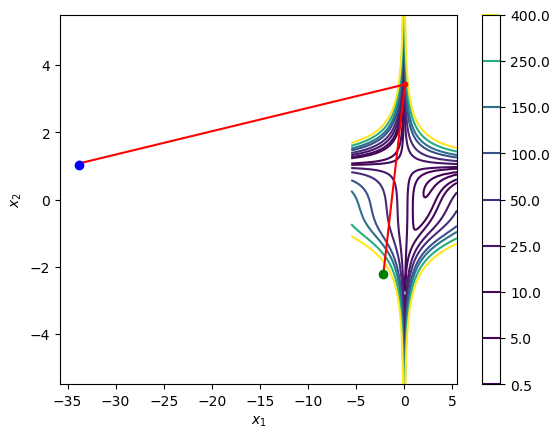

In [47]:
# Redefinimos el valor de c1
c1 = 0.0001

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, convergio, secuencia, a_seq, iBack_seq = DescensoMax_Backtracking(func, grad_func, x0, tau, NMax, alpha_0, rho, c1, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"El valor promedio de los tamaños de paso: ", np.mean(a_seq))
            print(f"El valor promedio de las iteraciones del backtracking: ", np.mean(iBack_seq))
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Beale
print("Función de Beale:")
probar_descenso_maximo(beale, grad_beale, puntos_iniciales_beale)


El valor utilizado de c1 = 0.001 no fue el mejor valor para asegurar la convergencia del algoritmo de descenso máximo. En ambos puntos sobre los cuales se probó el algoritmo en la gráfica parece bastante grande el primer paso. En el primer punto el algoritmo si pudo converger al valor mínimo, sin embargo en el segundo punto el algoritmo no convergió, en la gráfica parece que se esta saltando de punto en punto sin poder encontrar el valor mínimo. Escoger un valor c1 es muy importante, ya que puede asegurar la convergencia del algoritmo. Si se escoge un valor muy pequeño estando relativamente cerca del mínimo, los pasos iniciales serán bastante grandes, pudiendo ocasionar que nunca se alcance el mínimo. En cambio si se escoge un valor muy pequeño y se encuentra en un punto inicial lejano, es probable que se alcance el mínimo aunque después de bastantes iteraciones, por lo que aumenta el costo computacional. 

## Ejercicio 2

Reprograme el Algoritmo 3 de la Clase 6 de descenso máximo para calcular el tamaño de paso inicial del algoritmo de backtracking.

**1. Modifique la función del Punto 2 del Ejercicio 1 de modo que en la iteración k = 0 se invoque a la función que ejecuta el backtracking usando el valor $\alpha_{ini}$ dado**

$$
backtracking(f, x_k, f_k, \nabla f_k, p_k, \alpha_{ini}, c1, N_b)
$$

y para k > 0 se calcule el valor inicial del tamaño de paso como

$$
\bar{\alpha} = \alpha_{k-1} \min \left(  100, \frac{\nabla f^T_{k-1} p_{k-1}}{\nabla f^T_{k} p_{k}} \right)
$$

y se use este valor al ejecutar backtracking:

$$
backtracking(f, x_k, f_k, \nabla f_k, p_k, \bar{\alpha}, c1, N_b)
$$

In [48]:
def DescensoMax_Backtracking_Mod(f, gradf, x0, tau, nMax, alpha_0, rho, c1, nBack):
    xk = np.array(x0)
    sequence = [xk.copy()] 
    alpha_sequence = []
    iteraBack_sequence = []

    alpha_k = alpha_0  # Inicializa alpha_k para la primera iteración

    for k in range(nMax):
        gk = gradf(xk)
        pk = -gk  # Dirección de descenso

        # Calcular el tamaño de paso utilizando backtracking
        if k == 0:
            alpha_k, iteraBack = Backtracking_DescSuf(alpha_0, rho, c1, xk, f, gk, pk, nBack)
        else:
            # Convierte el último elemento de sequence a un array de NumPy
            gk_1 = gradf(np.array(sequence[-1]))  # gradf en xk de la iteración anterior
            pk_1 = -gk_1  # pk de la iteración anterior
            alpha_bar = min(100, np.dot(gk_1.T, pk_1) / np.dot(gk.T, pk) if np.dot(gk.T, pk) != 0 else 100)
            alpha_k, iteraBack = Backtracking_DescSuf(alpha_bar, rho, c1, xk, f, gk, pk, nBack)

        alpha_sequence.append(alpha_k)
        iteraBack_sequence.append(iteraBack)

        # Verificar la condición de parada
        if np.linalg.norm(alpha_k * pk) < tau:
            return xk, k, True, sequence, alpha_sequence, iteraBack_sequence

        # Actualizar xk para la siguiente iteración
        xk = xk + alpha_k * pk

        # Guardar la secuencia de puntos si la dimensión de x es 2
        if len(x0) == 2:
            sequence.append(xk.copy()) 

    return xk, nMax, False, sequence, alpha_sequence, iteraBack_sequence

**2. Repita las pruebas del Ejercicio 1, imprimiendo los mismos resultado:**

- El número de iteraciones realizadas k
- El punto $x_k$ obtenido 
- $f(x_k)$
- $\| \nabla f (x) \|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no.

Además, si n = 2, imprima

- El valor promedio de los tamaños de paso $\alpha_0, \alpha_1, ... \alpha_k$
- El valor promedio de las iteraciones $i_0 i_1, ..., i_k$ realizadas por el algoritmo de backtracking.
- La gráfica de los contornos de nivel de la función y la trayectoria de los puntos $x_0, x_1, ..., x_k$.

Función de Himmelblau:
Resultado para x0 = [2. 4.]:
xk = [2.99999999 1.99999999], k = 33, f(xk) = 5.286391418787153e-15, convergió: True
El valor promedio de los tamaños de paso:  0.01922064963718197
El valor promedio de las iteraciones del backtracking:  17.441176470588236
Secuencia de puntos: [array([2., 4.]), array([2.04194304, 0.4348416 ]), array([3.78078184, 1.02836648]), array([2.90097237, 1.03192099]), array([3.44326557, 1.38385384]), array([2.94665631, 1.46685579]), array([3.25799555, 1.7564073 ]), array([2.8852772 , 1.79861097]), array([3.15270025, 1.98060673]), array([2.94094951, 1.93668005])]


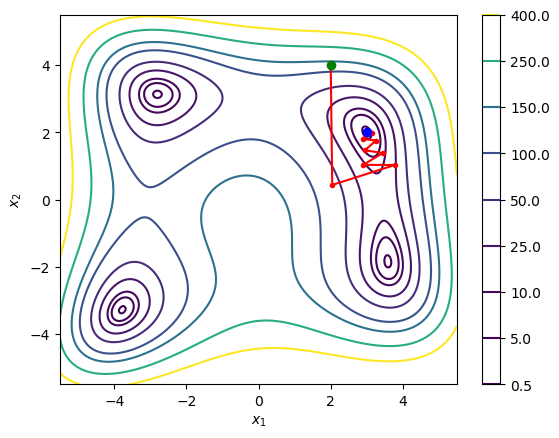


Resultado para x0 = [0. 0.]:
xk = [2.99999999 2.        ], k = 29, f(xk) = 6.872112423265734e-15, convergió: True
El valor promedio de los tamaños de paso:  0.022063147408621597
El valor promedio de las iteraciones del backtracking:  17.166666666666668
Secuencia de puntos: [array([0., 0.]), array([1.4, 2.2]), array([3.15147804, 3.09579411]), array([2.4843925 , 1.74331046]), array([3.24111483, 2.11406462]), array([2.83743375, 1.94752203]), array([3.11002795, 2.0574792 ]), array([2.93412263, 1.98029807]), array([3.02613848, 2.01568296]), array([2.98516102, 1.99649916])]


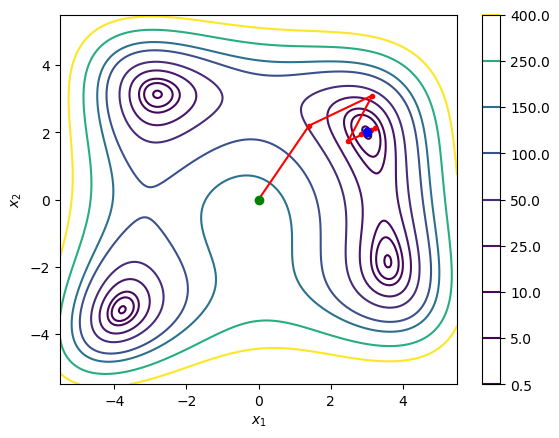


Función de Beale:
Resultado para x0 = [2. 3.]:
xk = [2.99999925 0.4999998 ], k = 1008, f(xk) = 9.175240759236597e-14, convergió: True
El valor promedio de los tamaños de paso:  0.04286231544907337
El valor promedio de las iteraciones del backtracking:  14.180376610505451
Secuencia de puntos: [array([2., 3.]), array([ 0.13791187, -0.75398621]), array([ 1.91511557, -0.83157289]), array([1.49930071, 0.34322266]), array([ 2.11532423, -0.28909049]), array([1.93784876, 0.29779496]), array([2.20793355, 0.03814696]), array([2.17839799, 0.33137646]), array([2.31798161, 0.17318195]), array([2.31359796, 0.32741828])]


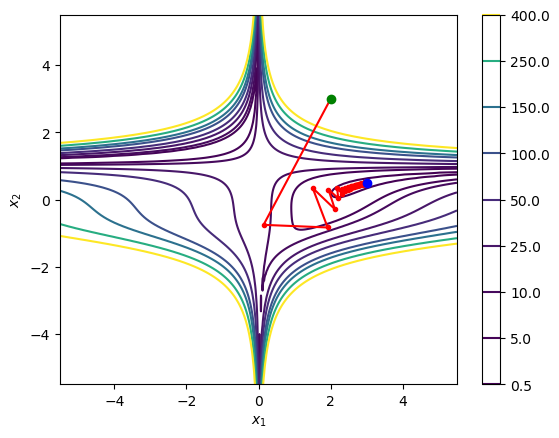


Resultado para x0 = [2. 4.]:
xk = [3.00000074 0.50000019], k = 2616, f(xk) = 8.93203311843492e-14, convergió: True
El valor promedio de los tamaños de paso:  0.024571555736100852
El valor promedio de las iteraciones del backtracking:  17.490638135269393
Secuencia de puntos: [array([2., 4.]), array([-0.66454988,  0.01414256]), array([4.79331758, 0.98951437]), array([4.79435363, 0.51951928]), array([4.74664716, 0.81269537]), array([4.7528878 , 0.67299088]), array([4.7428308, 0.7745856]), array([4.7461892 , 0.71115411]), array([4.74212641, 0.75567569]), array([4.74372918, 0.72508836])]


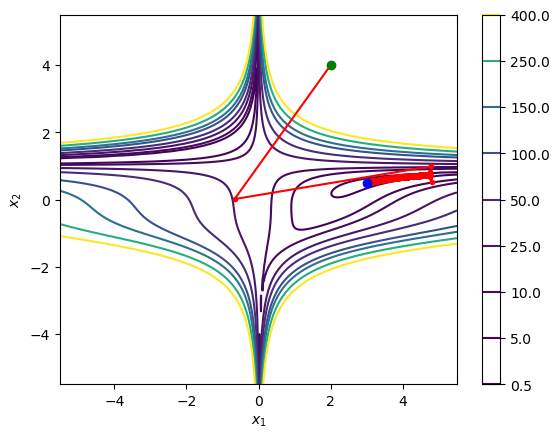


Función de Rosenbrock:
Resultado para x0 = [-2.1  4.5]:
xk = [1.00000613 1.00001227], k = 21719, f(xk) = 3.76242913067532e-11, convergió: True
El valor promedio de los tamaños de paso:  0.0016277590780302627
El valor promedio de las iteraciones del backtracking:  29.21804788213628
Secuencia de puntos: [array([-2.1,  4.5]), array([-2.13277322,  4.49149974]), array([-2.11042928,  4.49614213]), array([-2.12236703,  4.492716  ]), array([-2.1157958 ,  4.49366731]), array([-2.11913009,  4.49228198]), array([-2.11664156,  4.4921228 ]), array([-2.11861167,  4.4909108 ]), array([-2.11647833,  4.49066788]), array([-2.11812027,  4.48953335])]


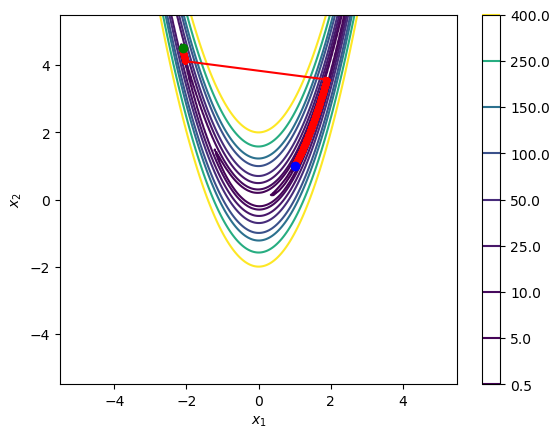


Resultado para x0 = [-1.2  1. ]:
xk = [1.000006 1.000012], k = 9447, f(xk) = 3.599450248233826e-11, convergió: True
El valor promedio de los tamaños de paso:  0.002055766144993586
El valor promedio de las iteraciones del backtracking:  27.857112616426758
Secuencia de puntos: [array([-1.2,  1. ]), array([-0.88928765,  1.12682137]), array([-1.11315695,  0.99684198]), array([-0.93968599,  1.0718229 ]), array([-1.04350375,  1.01338806]), array([-0.98840639,  1.0367579 ]), array([-1.0188444 ,  1.01824738]), array([-1.00011201,  1.02437411]), array([-1.00887181,  1.01690002]), array([-1.00038043,  1.01725682])]


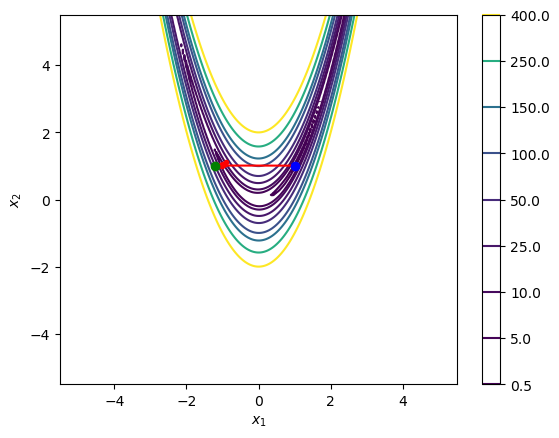


Resultado para x0 = [-2.1  4.5 -2.1  4.5 -2.1  4.5 -2.1  4.5 -2.1  4.5]:
xk = [0.99999997 0.99999994 0.99999988 0.99999976 0.99999952 0.99999903
 0.99999807 0.99999612 0.99999222 0.9999844 ], k = 19261, f(xk) = 8.089643548001848e-11, convergió: True

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [0.99999997 0.99999994 0.99999988 0.99999976 0.99999952 0.99999904
 0.99999807 0.99999614 0.99999226 0.99998448], k = 19210, f(xk) = 8.001284109162958e-11, convergió: True



In [49]:
# Parámetros iniciales
alpha_0 = 0.1
rho = 0.8
c1 = 0.1

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, convergio, secuencia, a_seq, iBack_seq = DescensoMax_Backtracking_Mod(func, grad_func, x0, tau, NMax, alpha_0, rho, c1, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"El valor promedio de los tamaños de paso: ", np.mean(a_seq))
            print(f"El valor promedio de las iteraciones del backtracking: ", np.mean(iBack_seq))
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_descenso_maximo(himmelblau, grad_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_descenso_maximo(beale, grad_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_descenso_maximo(rosenbrock, grad_rosenbrock, puntos_iniciales_rosenbrock)


**3. Con base en el valor promedio de las iteraciones realizadas por el algoritmo de backtracking, el valor k y las gráficas, escriba un comentario sobre si el cambio realizado ayuda al desempeño del método. ¿Hay alguna diferencia entre importante entre calcular el tamaño de paso de manera exacta con respecto a la búsqueda inexacta?**

Al analizar el valor promedio de las iteraciones realizadas por el algoritmo de backtracking, se observa que la utilización de un tamaño de paso calculado de manera inexacta de manera general resulta en un menor número de iteraciones de backtracking en comparación con el cálculo exacto del tamaño de paso. Esto sugiere que el enfoque inexacto permite ajustes más flexibles y posiblemente más eficientes del tamaño de paso en cada iteración, adaptándose mejor a las características locales de la función objetivo.

Sin embargo, es importante destacar que, aunque el número promedio de iteraciones de backtracking es mayor cuando se utiliza el cálculo exacto del tamaño de paso, el número total de iteraciones requeridas por el algoritmo de descenso máximo tiende a disminuir. Esto indica que, a pesar de la mayor carga computacional por iteración debido al mayor número de iteraciones de backtracking, el ajuste más preciso del tamaño de paso puede conducir a una dirección de descenso más efectiva, logrando una convergencia más rápida hacia el mínimo de la función objetivo.

Por lo tanto, aunque el enfoque inexacto puede parecer más eficiente a primera vista debido al menor número de iteraciones de backtracking, el cálculo exacto del tamaño de paso puede ofrecer ventajas significativas en términos de la eficiencia global del algoritmo de descenso máximo, especialmente en funciones complejas o en regiones del espacio de búsqueda donde la dirección de descenso óptima cambia rápidamente.

## Ejercicio 3

Sea $f(x) = f(x1, x2) = 5 + x1^2 + x2^2$. Si $x_0 = (−1, 1)^T$, $p_0 = (1, 0)$ y $c_1 = 10^{−4}$. Verifique de $p_0$ es una dirección de descenso y encuentre el valor más grande $\alpha > 0$ que satisface la condición de
descenso suficiente:

$$
f(x_0 + \alpha p_0) \leq f(x_0) + c_1 \alpha p_0^T \nabla f(x_0)
$$

---

Para resolver este ejercicio comenzamos calculando el gradiente de la función $f(x) = 5 + x_1^2 + x_2^2$. El gradiente de $f$, denotado como $\nabla f(x)$, es igual a:

$$ 
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right)^T = (2x_1, 2x_2)^T 
$$

Evaluando el gradiente en $x_0 = (-1, 1)^T$:

$$ 
\nabla f(x_0) = (2(-1), 2(1)) = (-2, 2)^T 
$$

Ahora tenemos que verificar si $p_0$ es una dirección de descenso. Dado $p_0 = (1, 0)$, para verificar si es una dirección de descenso, calculamos el producto punto $p_0^T \nabla f(x_0)$:

$$ 
p_0^T \nabla f(x_0) = (1, 0) \cdot (-2, 2) = -2 
$$

Como el resultado es negativo, $p_0$ es una dirección de descenso en $x_0$.

Para encontrar el valor mas grande de $\alpha>0$ que satisface la condición de descenso suficiente, expresamos $f(x_0 + \alpha p_0)$ sustituyendo $x_0 + \alpha p_0$ en $f(x)$:

$$ 
x_0 + \alpha p_0 = (-1, 1)^T + \alpha(1, 0)^T = (-1 + \alpha, 1) 
$$

$$ 
f(x_0 + \alpha p_0) = 5 + (-1 + \alpha)^2 + 1^2 = 5 + \alpha^2 - 2\alpha + 1 + 1 
$$

$$ 
= \alpha^2 - 2\alpha + 7 
$$

Aplicamos la condición de descenso suficiente:

$$ 
f(x_0 + \alpha p_0) \leq f(x_0) + c_1 \alpha p_0^T \nabla f(x_0) 
$$

$$ 
\alpha^2 - 2\alpha + 7 \leq 7 - 2 \cdot 10^{-4} \alpha 
$$

Simplificando, obtenemos:

$$ 
\alpha^2 - (2 + 2 \cdot 10^{-4})\alpha \leq 0 
$$

$$ 
\alpha(\alpha - (2 + 2 \cdot 10^{-4})) \leq 0 
$$

De esta inecuación, $\alpha = 0$ o $\alpha = 2 + 2 \cdot 10^{-4}$. Dado que estamos buscando $\alpha > 0$, el valor más grande de $\alpha$ que satisface la condición es $\alpha = 2 + 2 \cdot 10^{-4}$.

La dirección $p_0 = (1, 0)$ es una dirección de descenso en $x_0 = (-1, 1)^T$ para la función dada, y el valor más grande de $\alpha > 0$ que satisface la condición de descenso suficiente es $\alpha = 2 + 2 \cdot 10^{-4}$.

## Ejercicio 4



Sea $f: \mathbb{R}^n \rightarrow \mathbb{R}$ y $\mathbf{S}$ una matriz no singular de tamaño $n \times n$. Si $\mathbf{x}=$ Sy para $\mathbf{y} \in \mathbb{R}^n$ y definimos $g(\mathbf{y})=f(\mathbf{S y})$, aplicando la regla de la cadena muestre que
$$
\nabla g(\mathbf{y})=\mathbf{S}^{\top} \nabla f(\mathbf{x}) .
$$

Entonces aplicando el método de máximo descenso a la función $g$ es
$$
\mathbf{y}_{k+1}=\mathbf{y}_k-\alpha_k \mathbf{S}^{\top} \nabla f\left(\mathbf{S y}_k\right) .
$$

Multiplicando por $\mathbf{S}$ ambos miembros de la ecuación y usando la notación $\mathbf{x}_k=\mathbf{S y}_k$ :
$$
\mathbf{x}_{k+1}=\mathbf{S y}_{k+1}=\mathbf{S y}_k-\alpha_k \mathbf{S S}^{\top} \nabla f\left(\mathbf{S y}_k\right)=\mathbf{x}_k-\alpha_k \mathbf{S S}^{\top} \nabla f\left(\mathbf{x}_k\right) .
$$

Si $\mathbf{D}=\mathbf{S S}^{\top}$, obtenemos el método de gradiente escalado:
$$
\mathbf{x}_{k+1}=\mathbf{x}_k-\alpha_k \mathbf{D} \nabla f\left(\mathbf{x}_k\right) .
$$

Muestre que $-\mathbf{D} \nabla f\left(\mathbf{x}_k\right)$ es una dirección de descenso.

---

**$\nabla g(\mathbf{y})=\mathbf{S}^{\top} \nabla f(\mathbf{x})$ demostración**

Para mostrar que $\nabla g(\mathbf{y}) = \mathbf{S}^\top \nabla f(\mathbf{x})$, necesitamos utilizar la regla de la cadena. Dada la función compuesta $g(\mathbf{y}) = f(\mathbf{S}\mathbf{y})$, aplicamos la regla de la cadena a esta composición.

La regla de la cadena para derivadas parciales se expresa como:

$$
\frac{\partial g}{\partial y_i} = \sum_{j=1}^{n} \frac{\partial f}{\partial x_j} \frac{\partial x_j}{\partial y_i}
$$

donde $x_j$ son las componentes de $\mathbf{x} = \mathbf{S}\mathbf{y}$, y $y_i$ son las componentes de $\mathbf{y}$.

Ahora, como $\mathbf{x} = \mathbf{S}\mathbf{y}$, cada componente $x_j$ se puede expresar como una combinación lineal de las componentes de $\mathbf{y}$, es decir, $x_j = \sum_{k=1}^{n} S_{jk} y_k$. Por lo tanto, la derivada de $x_j$ respecto a $y_i$ es simplemente el elemento $S_{ji}$ de la matriz $\mathbf{S}$, ya que todos los otros términos en la suma son constantes respecto a $y_i$ y se anulan al derivar. Esto nos da:

$$
\frac{\partial x_j}{\partial y_i} = S_{ji}
$$

Ahora, construyendo el gradiente usando la relación de las derivadas parciales obtenida anteriormente, podemos reescribir la regla de la cadena como:

$$
\frac{\partial g}{\partial y_i} = \sum_{j=1}^{n} \frac{\partial f}{\partial x_j} S_{ji}
$$

Si consideramos todas las derivadas parciales de $g$ respecto a cada componente de $\mathbf{y}$, obtenemos el gradiente de $g$:

$$
\nabla g(\mathbf{y}) = \left[ \begin{array}{c}
\sum_{j=1}^{n} \frac{\partial f}{\partial x_1} S_{j1} \\
\vdots \\
\sum_{j=1}^{n} \frac{\partial f}{\partial x_n} S_{jn}
\end{array} \right]
$$

Este vector puede reescribirse en forma matricial como $\mathbf{S}^\top \nabla f(\mathbf{x})$, donde $\nabla f(\mathbf{x})$ es el gradiente de $f$ evaluado en $\mathbf{x}$ y $\mathbf{S}^\top$ es la matriz transpuesta de $\mathbf{S}$. Esto demuestra que $\nabla g(\mathbf{y}) = \mathbf{S}^\top \nabla f(\mathbf{x})$.

**$-\mathbf{D} \nabla f\left(\mathbf{x}_k\right)$ dirección de descenso**

Para demostrar que $-\mathbf{D} \nabla f(\mathbf{x}_k)$ es una dirección de descenso, necesitamos mostrar que el producto punto entre esta dirección y el gradiente de $f$ en $\mathbf{x}_k$ es negativo, es decir:

$$
-\nabla f(\mathbf{x}_k)^T (\mathbf{D} \nabla f(\mathbf{x}_k)) < 0
$$

Dado que $\mathbf{D} = \mathbf{S S}^T$, podemos reescribir la expresión anterior como:

$$
-\nabla f(\mathbf{x}_k)^T (\mathbf{S S}^T \nabla f(\mathbf{x}_k))
$$

La expresión $-\nabla f(\mathbf{x}_k)^T (\mathbf{S S}^T \nabla f(\mathbf{x}_k))$ implica el producto de $\nabla f(\mathbf{x}_k)^T$, que es un vector fila, con $\mathbf{S S}^T \nabla f(\mathbf{x}_k)$, que resulta en un vector columna después de la multiplicación por $\mathbf{S S}^T$.

La matriz $\mathbf{D}$ es el producto de $\mathbf{S}$ y su transpuesta $\mathbf{S}^T$, lo que garantiza que $\mathbf{D}$ es simétrica ($\mathbf{D} = \mathbf{D}^T$) y semidefinida positiva. Esto último significa que para cualquier vector no nulo $\mathbf{v}$, la expresión $\mathbf{v}^T \mathbf{D} \mathbf{v}$ es siempre no negativa.

Considerando que $\mathbf{D}$ es semidefinida positiva, para el vector $\nabla f(\mathbf{x}_k)$ tenemos:

$$
\nabla f(\mathbf{x}_k)^T \mathbf{D} \nabla f(\mathbf{x}_k) \geq 0
$$

Al agregar el signo negativo delante, la expresión se convierte en negativa:

$$
-\nabla f(\mathbf{x}_k)^T \mathbf{D} \nabla f(\mathbf{x}_k) \leq 0
$$

Para que $-\mathbf{D} \nabla f(\mathbf{x}_k)$ sea una dirección de descenso, necesitamos que esta expresión sea estrictamente negativa, es decir, que $\nabla f(\mathbf{x}_k) \neq \mathbf{0}$. Dado que estamos optimizando la función, buscamos mover $\mathbf{x}_k$ en una dirección que disminuya $f$, lo cual no ocurriría si $\nabla f(\mathbf{x}_k) = \mathbf{0}$ (puesto que esto indicaría que $\mathbf{x}_k$ ya está en un mínimo).

Por lo tanto, si $\nabla f(\mathbf{x}_k) \neq \mathbf{0}$, entonces $-\mathbf{D} \nabla f(\mathbf{x}_k)$ efectivamente representa una dirección de descenso, ya que el producto punto $-\nabla f(\mathbf{x}_k)^T (\mathbf{D} \nabla f(\mathbf{x}_k))$ será estrictamente negativo, indicando que moverse en esa dirección reduce el valor de $f$.

